In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

In [13]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MMAI 5000/Group Project/CrimeDatabase_Extended.csv')

In [14]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,POPMALE1529,HIGHRISE,SOCIOLONELY,LOW_INCOME,UNAFFORDABLE_HOUSE,INADEQUATE_HOUSE,UNSUITABLE_HOUSE,DROPOUT,UNEMPLOYMENT,MALE_UNEMPLOYMENT
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,11.47%,50.61%,9.70%,27.20%,35.90%,7.80%,19.20%,20.39%,10.60%,9.80%
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,13.06%,22.01%,6.50%,15.80%,31.70%,4.70%,17.40%,21.21%,9.60%,9.20%
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,10.72%,55.53%,9.80%,33.00%,36.70%,13.60%,26.60%,37.84%,12.70%,11.30%
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,16.11%,91.74%,39.20%,26.00%,45.10%,5.30%,8.70%,4.19%,8.50%,7.90%
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,11.27%,23.67%,5.90%,20.40%,35.70%,6.90%,17.30%,20.47%,10.50%,10.60%


In [15]:
# Check if there is any null value
null_values = df.isnull().sum()
null_values

X                     0
Y                     0
OBJECTID              0
EVENT_UNIQUE_ID       0
OCC_DATE              0
OCC_YEAR              0
OCC_MONTH             0
OCC_DOW               0
OCC_DOY               0
OCC_DAY               0
OCC_HOUR              0
OCC_TIME_RANGE        0
DIVISION              0
DEATH                 0
INJURIES              0
HOOD_158              0
NEIGHBOURHOOD_158     0
HOOD_140              0
NEIGHBOURHOOD_140     0
LONG_WGS84            0
LAT_WGS84             0
Region                0
REGION_ID             0
REGION                0
POPULATION            0
POPDENSITY            0
POPYOUTH1524          0
POPSENIOR             0
POPMALE1529           0
HIGHRISE              0
SOCIOLONELY           0
LOW_INCOME            0
UNAFFORDABLE_HOUSE    0
INADEQUATE_HOUSE      0
UNSUITABLE_HOUSE      0
DROPOUT               0
UNEMPLOYMENT          0
MALE_UNEMPLOYMENT     0
dtype: int64

In [16]:
column_data_types = {
   'POPYOUTH1524' : 'float64'  ,
   'POPSENIOR' : 'float64' ,
   'POPMALE1529' : 'float64' ,
   'HIGHRISE' : 'float64' ,
   'SOCIOLONELY' : 'float64' ,
   'LOW_INCOME' : 'float64' ,
   'UNAFFORDABLE_HOUSE' : 'float64' ,
   'INADEQUATE_HOUSE' : 'float64' ,
   'UNSUITABLE_HOUSE' : 'float64' ,
   'DROPOUT' : 'float64' ,
   'UNEMPLOYMENT' : 'float64' ,
   'MALE_UNEMPLOYMENT' : 'float64'
}

for key in column_data_types.keys():
    df[key] = df[key].str.strip('%')
    df[key] = pd.to_numeric(df[key])

# grouped_df[column_data_types.keys()] = pd.to_numeric(grouped_df[column_data_types.keys()])

# Change the data type of the columns using astype()
# grouped_df = grouped_df.astype(column_data_types)
print(df.dtypes)

X                     float64
Y                     float64
OBJECTID                int64
EVENT_UNIQUE_ID        object
OCC_DATE               object
OCC_YEAR                int64
OCC_MONTH              object
OCC_DOW                object
OCC_DOY                 int64
OCC_DAY                 int64
OCC_HOUR                int64
OCC_TIME_RANGE         object
DIVISION               object
DEATH                   int64
INJURIES                int64
HOOD_158                int64
NEIGHBOURHOOD_158      object
HOOD_140                int64
NEIGHBOURHOOD_140      object
LONG_WGS84            float64
LAT_WGS84             float64
Region                  int64
REGION_ID               int64
REGION                 object
POPULATION              int64
POPDENSITY              int64
POPYOUTH1524          float64
POPSENIOR             float64
POPMALE1529           float64
HIGHRISE              float64
SOCIOLONELY           float64
LOW_INCOME            float64
UNAFFORDABLE_HOUSE    float64
INADEQUATE

In [18]:
data_cleaned = df.drop(columns=['X', 'Y'])

In [19]:
# Convert 'DEATH' and 'INJURIES' to numeric values, replace non-numeric values if any
df['DEATH'] = pd.to_numeric(df['DEATH'], errors='coerce')
df['INJURIES'] = pd.to_numeric(df['INJURIES'], errors='coerce')

# Create a new column that is the sum of 'DEATH' and 'INJURIES'
df['DEATH_INJURIES'] = df['DEATH'] + df['INJURIES']

# Group by 'HOOD_140' and sum the 'DEATH_INJURIES' for each group
grouped_data = df.groupby('HOOD_140')['DEATH_INJURIES'].sum().reset_index()

# Sort the data by 'HOOD_140'
grouped_data = grouped_data.sort_values(by='HOOD_140')

grouped_data.head()

,HOOD_140,DEATH_INJURIES
0,1,85
1,2,116
2,3,6
3,4,12
4,5,41


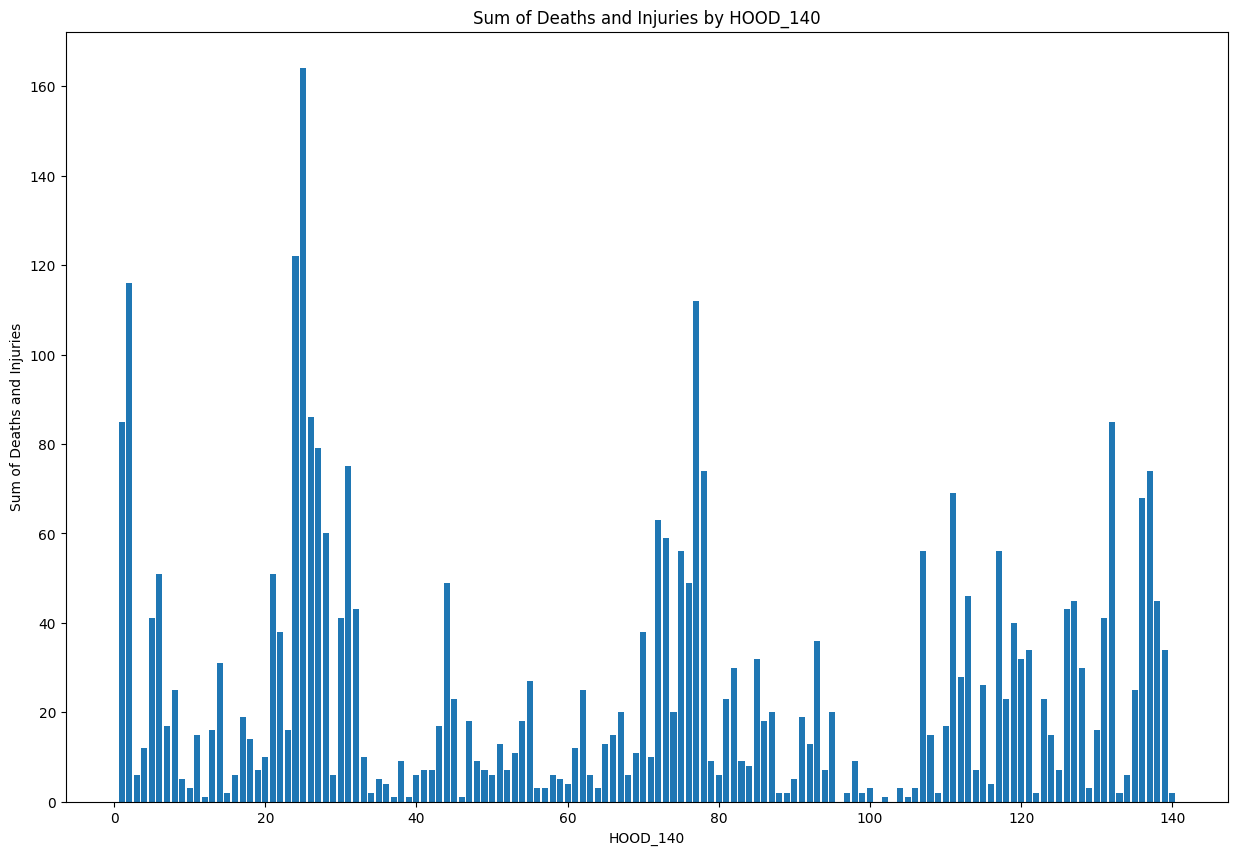

In [20]:
# Set figure size
plt.figure(figsize=(15,10))

# Plot a bar chart
plt.bar(grouped_data['HOOD_140'], grouped_data['DEATH_INJURIES'])

# Set the title and labels
plt.title('Sum of Deaths and Injuries by HOOD_140')
plt.xlabel('HOOD_140')
plt.ylabel('Sum of Deaths and Injuries')

# Show the plot
plt.show()

In [21]:
# Convert the "OCC_DATE" column to datetime
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

# Create a new column for the month and year of the crime
df['YearMonth'] = df['OCC_DATE'].dt.to_period('M')

# Count the number of crimes per month
crime_counts = df['YearMonth'].value_counts().sort_index()



/var/folders/1s/1ydr33r9161b79pnkp2c_0fm0000gn/T/ipykernel_23602/4267063305.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['OCC_DATE'].dt.to_period('M')


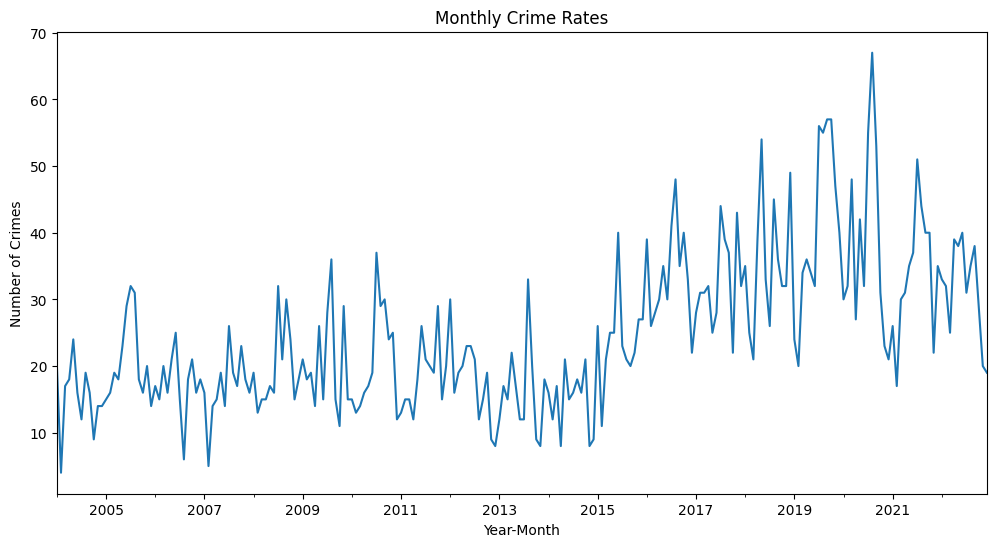

In [22]:
plt.figure(figsize=(12,6))
crime_counts.plot(kind='line')
plt.title('Monthly Crime Rates')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.show()

In [23]:
df['datetime'] = pd.to_datetime(df['OCC_DATE'])

In [24]:
df['month'] = df['datetime'].dt.month

In [25]:
features = ['month', 'POPULATION', 'POPDENSITY', 'POPYOUTH1524', 'POPSENIOR', 'POPMALE1529', 'HIGHRISE', 'SOCIOLONELY', 'LOW_INCOME', 'UNAFFORDABLE_HOUSE', 'INADEQUATE_HOUSE', 'UNSUITABLE_HOUSE', 
            'DROPOUT', 'UNEMPLOYMENT', 'MALE_UNEMPLOYMENT']
# POPULATION	POPDENSITY	POPYOUTH1524	POPSENIOR	POPMALE1529	HIGHRISE	SOCIOLONELY	LOW_INCOME	UNAFFORDABLE_HOUSE	INADEQUATE_HOUSE	UNSUITABLE_HOUSE	DROPOUT	UNEMPLOYMENT	MALE_UNEMPLOYMENT


grouped_df = df.groupby(['HOOD_140', 'OCC_MONTH'])[features].min()

# Reset the index to have the grouped columns as separate columns
grouped_df = grouped_df.reset_index()

# Add a new column 'count' representing the number of rows in the original dataset for each group
grouped_df['count'] = df.groupby(['HOOD_140', 'OCC_MONTH']).size().reset_index(name='count')['count']

# Display the resulting DataFrame
print(grouped_df)

      HOOD_140  OCC_MONTH  month  POPULATION  POPDENSITY  POPYOUTH1524   
0            1      April      4       33312        1117         16.35  \
1            1     August      8       33312        1117         16.35   
2            1   December     12       33312        1117         16.35   
3            1   February      2       33312        1117         16.35   
4            1    January      1       33312        1117         16.35   
...        ...        ...    ...         ...         ...           ...   
1241       140   December     12        9917        2673         10.74   
1242       140       June      6        9917        2673         10.74   
1243       140      March      3        9917        2673         10.74   
1244       140        May      5        9917        2673         10.74   
1245       140  September      9        9917        2673         10.74   

      POPSENIOR  POPMALE1529  HIGHRISE  SOCIOLONELY  LOW_INCOME   
0         14.95        13.06     22.01      

In [26]:
grouped_df

,HOOD_140,OCC_MONTH,month,POPULATION,POPDENSITY,POPYOUTH1524,POPSENIOR,POPMALE1529,HIGHRISE,SOCIOLONELY,LOW_INCOME,UNAFFORDABLE_HOUSE,INADEQUATE_HOUSE,UNSUITABLE_HOUSE,DROPOUT,UNEMPLOYMENT,MALE_UNEMPLOYMENT,count
0,1,April,4,33312,1117,16.35,14.95,13.06,22.01,6.5,15.8,31.7,4.7,17.4,21.21,9.6,9.2,13
1,1,August,8,33312,1117,16.35,14.95,13.06,22.01,6.5,15.8,31.7,4.7,17.4,21.21,9.6,9.2,13
2,1,December,12,33312,1117,16.35,14.95,13.06,22.01,6.5,15.8,31.7,4.7,17.4,21.21,9.6,9.2,7
3,1,February,2,33312,1117,16.35,14.95,13.06,22.01,6.5,15.8,31.7,4.7,17.4,21.21,9.6,9.2,7
4,1,January,1,33312,1117,16.35,14.95,13.06,22.01,6.5,15.8,31.7,4.7,17.4,21.21,9.6,9.2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,140,December,12,9917,2673,10.74,26.57,7.92,27.32,13.4,7.7,23.8,3.8,3.9,12.91,7.9,7.4,1
1242,140,June,6,9917,2673,10.74,26.57,7.92,27.32,13.4,7.7,23.8,3.8,3.9,12.91,7.9,7.4,1
1243,140,March,3,9917,2673,10.74,26.57,7.92,27.32,13.4,7.7,23.8,3.8,3.9,12.91,7.9,7.4,1
1244,140,May,5,9917,2673,10.74,26.57,7.92,27.32,13.4,7.7,23.8,3.8,3.9,12.91,7.9,7.4,2


In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_df['OCC_MONTH'] = pd.Categorical(grouped_df['OCC_MONTH'], categories=month_order, ordered=True)

grouped_df = grouped_df.sort_values(by=['HOOD_140', 'OCC_MONTH'])
grouped_df.reset_index(inplace=True)
# grouped_df = grouped_df.drop('index', axis = 1)

# print(grouped_df[grouped_df['HOOD_140'] == 1])
print(grouped_df[grouped_df['HOOD_140'] == 1])

    index  HOOD_140  OCC_MONTH  month  POPULATION  POPDENSITY  POPYOUTH1524   
0       4         1    January      1       33312        1117         16.35  \
1       3         1   February      2       33312        1117         16.35   
2       7         1      March      3       33312        1117         16.35   
3       0         1      April      4       33312        1117         16.35   
4       8         1        May      5       33312        1117         16.35   
5       6         1       June      6       33312        1117         16.35   
6       5         1       July      7       33312        1117         16.35   
7       1         1     August      8       33312        1117         16.35   
8      11         1  September      9       33312        1117         16.35   
9      10         1    October     10       33312        1117         16.35   
10      9         1   November     11       33312        1117         16.35   
11      2         1   December     12       33312   

In [28]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               1246 non-null   int64   
 1   HOOD_140            1246 non-null   int64   
 2   OCC_MONTH           1246 non-null   category
 3   month               1246 non-null   int32   
 4   POPULATION          1246 non-null   int64   
 5   POPDENSITY          1246 non-null   int64   
 6   POPYOUTH1524        1246 non-null   float64 
 7   POPSENIOR           1246 non-null   float64 
 8   POPMALE1529         1246 non-null   float64 
 9   HIGHRISE            1246 non-null   float64 
 10  SOCIOLONELY         1246 non-null   float64 
 11  LOW_INCOME          1246 non-null   float64 
 12  UNAFFORDABLE_HOUSE  1246 non-null   float64 
 13  INADEQUATE_HOUSE    1246 non-null   float64 
 14  UNSUITABLE_HOUSE    1246 non-null   float64 
 15  DROPOUT             1246 non-null   fl

In [29]:
grouped_df['crime_rate'] = grouped_df['count'] / grouped_df['POPULATION'] * 1000

In [30]:
column_data_types = {
   'POPYOUTH1524' : 'float64'  ,
   'POPSENIOR' : 'float64' ,
   'POPMALE1529' : 'float64' ,
   'HIGHRISE' : 'float64' ,
   'SOCIOLONELY' : 'float64' ,
   'LOW_INCOME' : 'float64' ,
   'UNAFFORDABLE_HOUSE' : 'float64' ,
   'INADEQUATE_HOUSE' : 'float64' ,
   'UNSUITABLE_HOUSE' : 'float64' ,
   'DROPOUT' : 'float64' ,
   'UNEMPLOYMENT' : 'float64' ,
   'MALE_UNEMPLOYMENT' : 'float64'
}

for key in column_data_types.keys():
    grouped_df[key] = grouped_df[key].str.strip('%')
    grouped_df[key] = pd.to_numeric(grouped_df[key])

# grouped_df[column_data_types.keys()] = pd.to_numeric(grouped_df[column_data_types.keys()])

# Change the data type of the columns using astype()
# grouped_df = grouped_df.astype(column_data_types)
print(grouped_df.dtypes)

AttributeError: Can only use .str accessor with string values!

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               1246 non-null   int64   
 1   HOOD_140            1246 non-null   int64   
 2   OCC_MONTH           1246 non-null   category
 3   month               1246 non-null   int32   
 4   POPULATION          1246 non-null   int64   
 5   POPDENSITY          1246 non-null   int64   
 6   POPYOUTH1524        1246 non-null   float64 
 7   POPSENIOR           1246 non-null   float64 
 8   POPMALE1529         1246 non-null   float64 
 9   HIGHRISE            1246 non-null   float64 
 10  SOCIOLONELY         1246 non-null   float64 
 11  LOW_INCOME          1246 non-null   float64 
 12  UNAFFORDABLE_HOUSE  1246 non-null   float64 
 13  INADEQUATE_HOUSE    1246 non-null   float64 
 14  UNSUITABLE_HOUSE    1246 non-null   float64 
 15  DROPOUT             1246 non-null   fl

In [ ]:
grouped_df.drop('OCC_MONTH', axis=1, inplace= True)

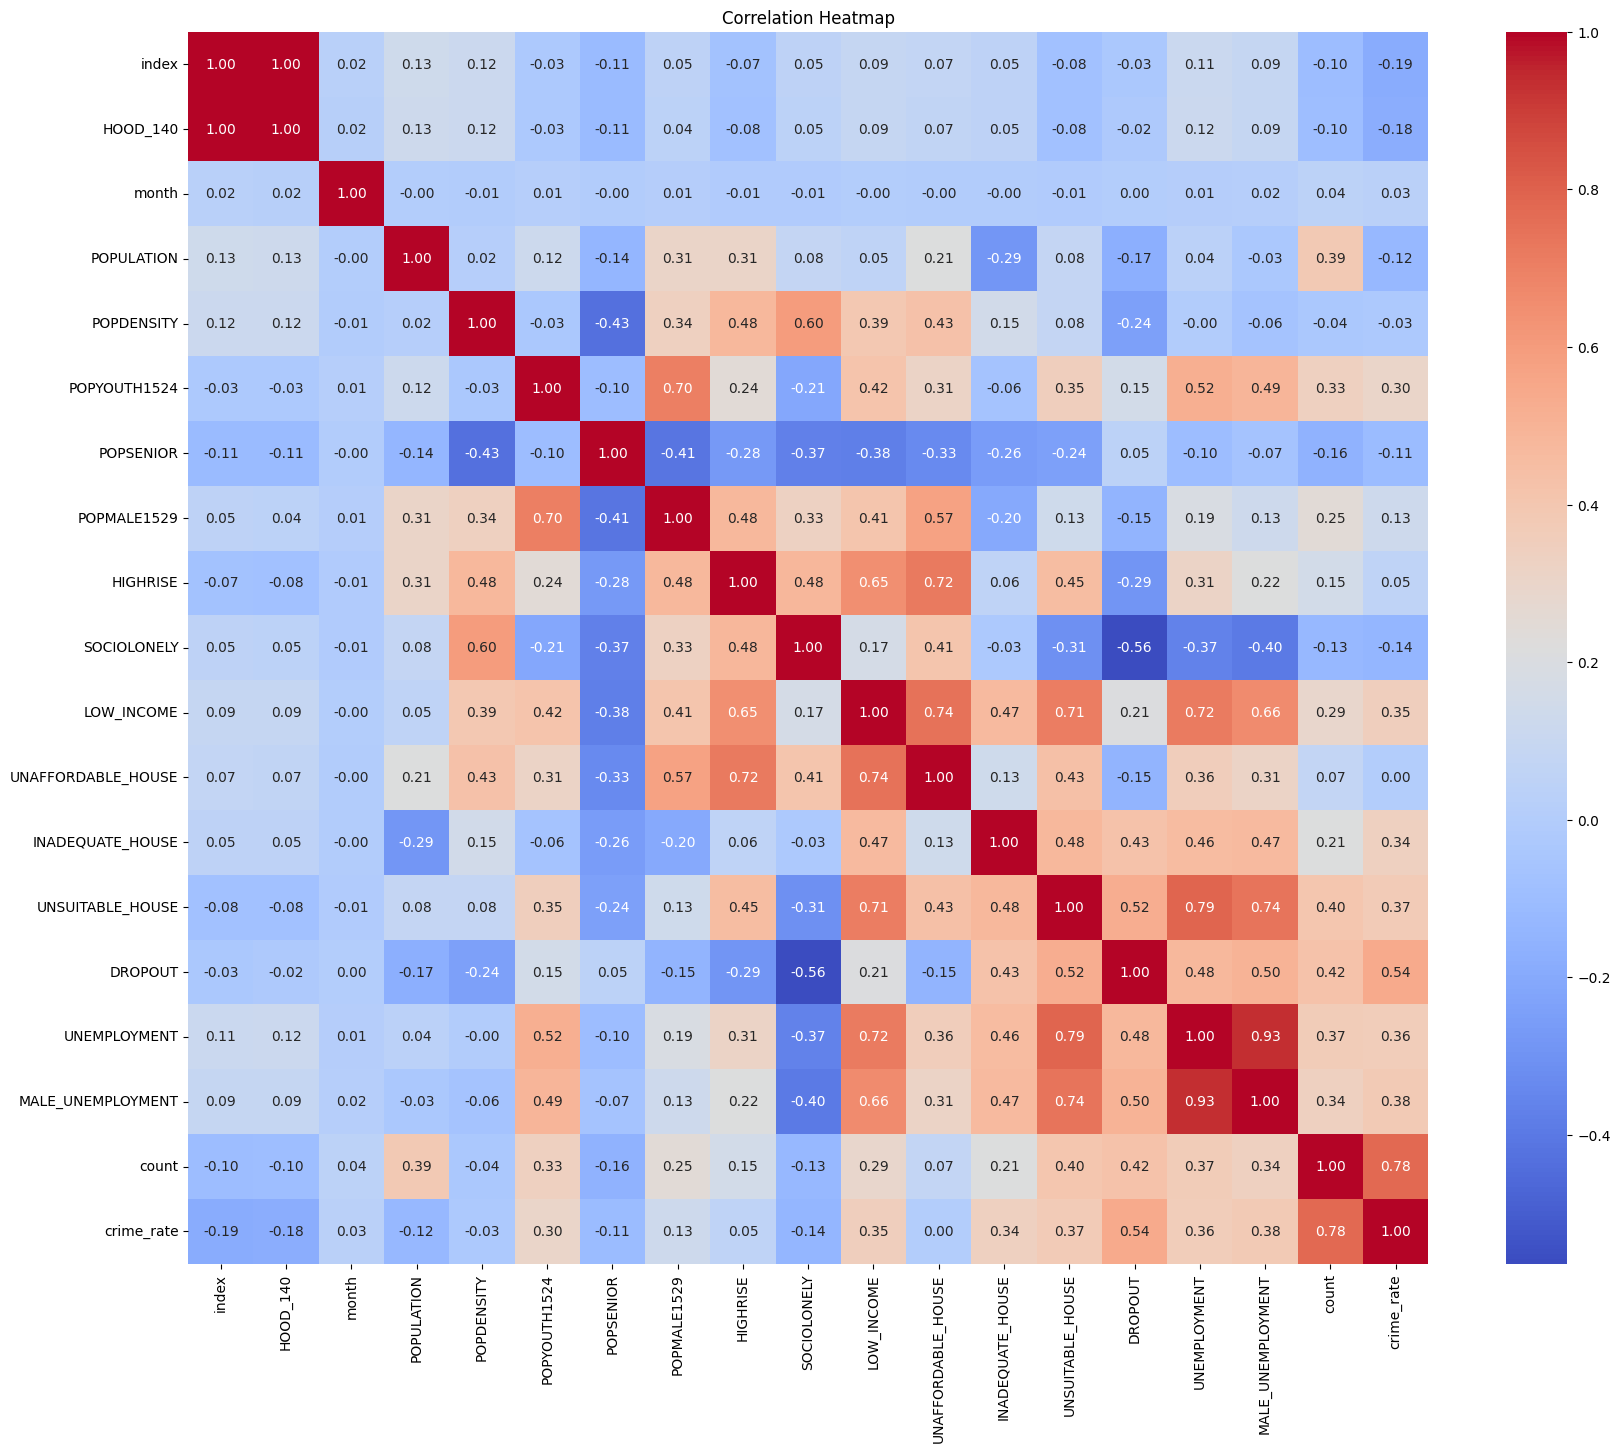

In [ ]:
correlations = grouped_df.corr()
correlations
plt.figure(figsize=(20, 16))

sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()


We can find popyouth1524, low_income, inadequate_house, unsutiable_house, dropout, unemployement, related to male_unemployment and hood_crime_rate
 

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1246 non-null   int64  
 1   HOOD_140            1246 non-null   int64  
 2   month               1246 non-null   int32  
 3   POPULATION          1246 non-null   int64  
 4   POPDENSITY          1246 non-null   int64  
 5   POPYOUTH1524        1246 non-null   float64
 6   POPSENIOR           1246 non-null   float64
 7   POPMALE1529         1246 non-null   float64
 8   HIGHRISE            1246 non-null   float64
 9   SOCIOLONELY         1246 non-null   float64
 10  LOW_INCOME          1246 non-null   float64
 11  UNAFFORDABLE_HOUSE  1246 non-null   float64
 12  INADEQUATE_HOUSE    1246 non-null   float64
 13  UNSUITABLE_HOUSE    1246 non-null   float64
 14  DROPOUT             1246 non-null   float64
 15  UNEMPLOYMENT        1246 non-null   float64
 16  MALE_U

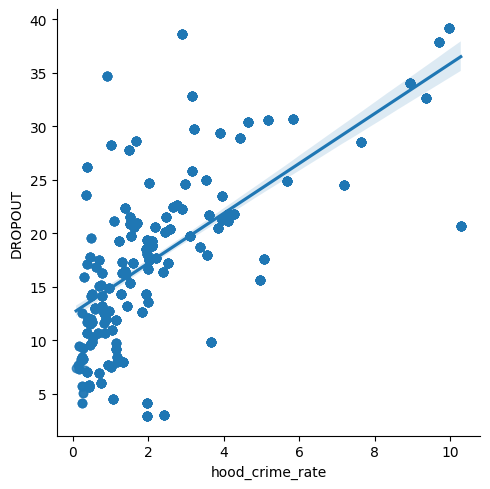

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to DROPOUT
sns.lmplot(x = 'hood_crime_rate', y = 'DROPOUT', data = df_hoods)

This graph shows that higher dropout results in higher crime

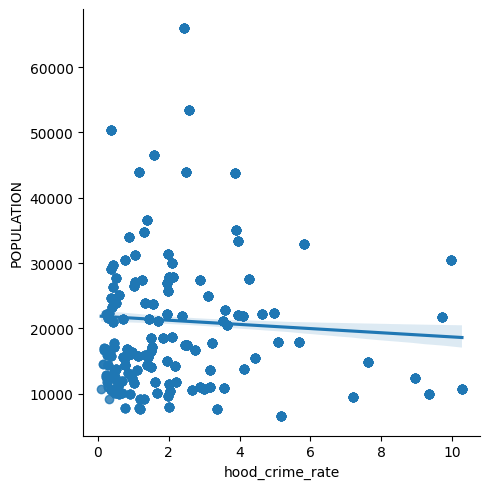

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to population
sns.lmplot(x = 'hood_crime_rate', y = 'POPULATION', data = df_hoods)

This graph shows that higher population results in lower crime

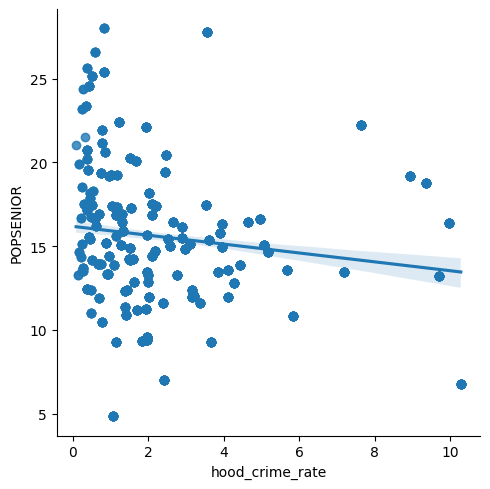

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to POPSENIOR
sns.lmplot(x = 'hood_crime_rate', y = 'POPSENIOR', data = df_hoods)

This graph shows that higher popsenior results in lower crime

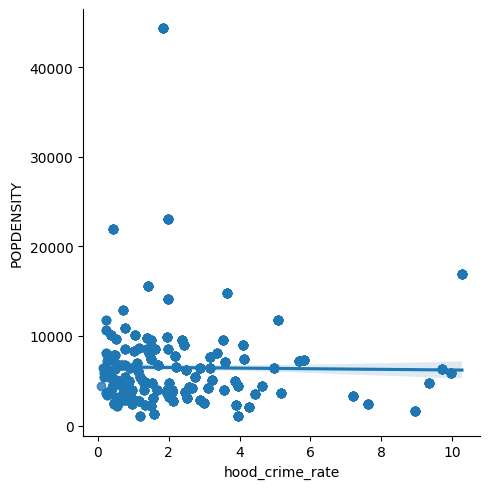

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to POPDENSITY
sns.lmplot(x = 'hood_crime_rate', y = 'POPDENSITY', data = df_hoods)

This graph did not show relationship between hood_crime_rate and popdensity.

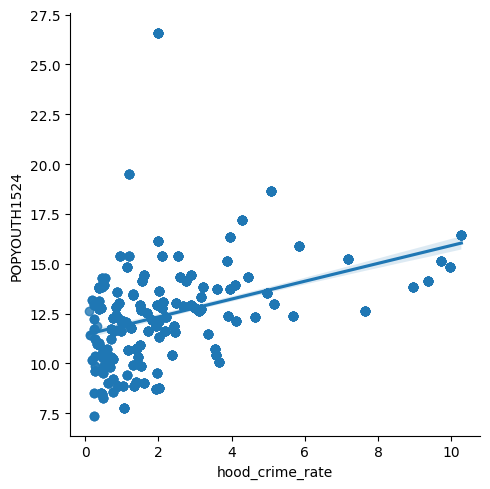

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to POPYOUTH1524
sns.lmplot(x = 'hood_crime_rate', y = 'POPYOUTH1524', data = df_hoods)

This graph shows that higher popyouth1524 results in higher crime

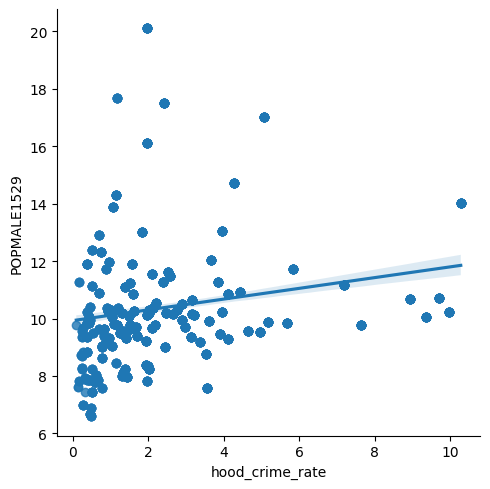

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to POPMALE1529
sns.lmplot(x = 'hood_crime_rate', y = 'POPMALE1529', data = df_hoods)

This graph shows that higher popmale1529 results in higher crime rate

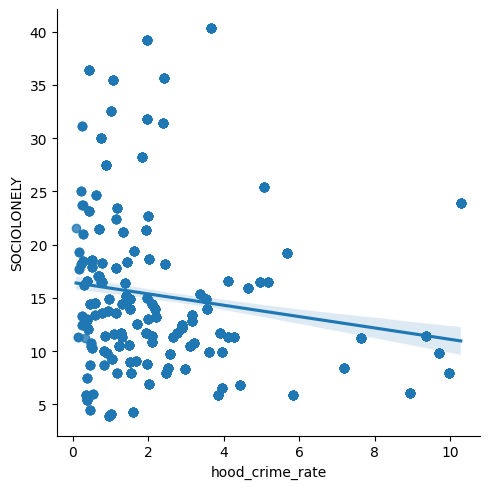

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to SOCIOLONELY
sns.lmplot(x = 'hood_crime_rate', y = 'SOCIOLONELY', data = df_hoods)

This graph shows that higher sociolonely results in lower crime rate

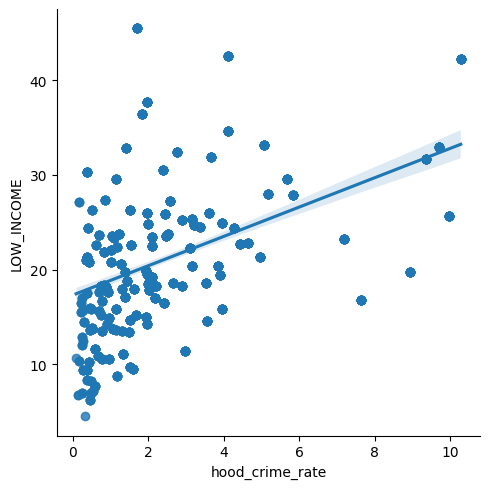

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to LOW_INCOME
sns.lmplot(x = 'hood_crime_rate', y = 'LOW_INCOME', data = df_hoods)

This graph shows that higher low_income rate results in higher crime rate

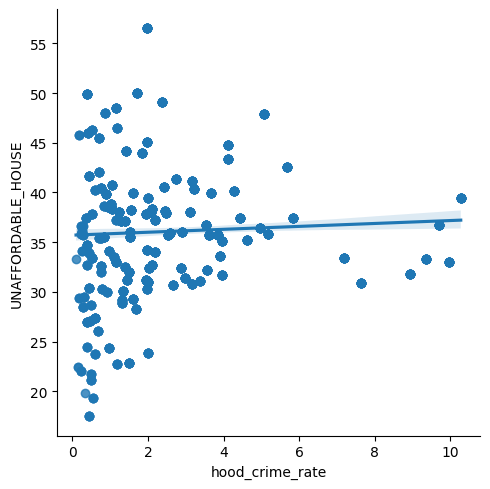

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to UNAFFORDABLE_HOUSE
sns.lmplot(x = 'hood_crime_rate', y = 'UNAFFORDABLE_HOUSE', data = df_hoods)

This graph shows that higher UNAFFORDABLE_HOUSE results in higher crime rate

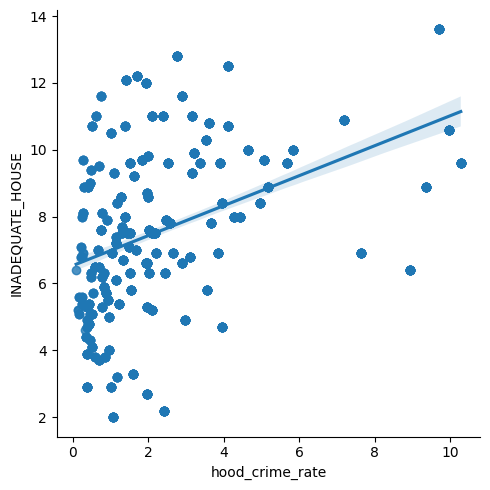

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to INADEQUATE_HOUSE
sns.lmplot(x = 'hood_crime_rate', y = 'INADEQUATE_HOUSE', data = df_hoods)

This graph shows that higher INADEQUATE_HOUSE results in higher crime rate

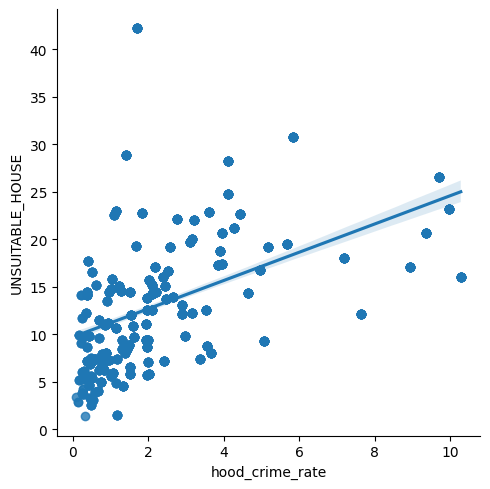

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to UNSUITABLE_HOUSE
sns.lmplot(x = 'hood_crime_rate', y = 'UNSUITABLE_HOUSE', data = df_hoods)

This graph shows that higher UNSUITABLE_HOUSE results in higher crime rate

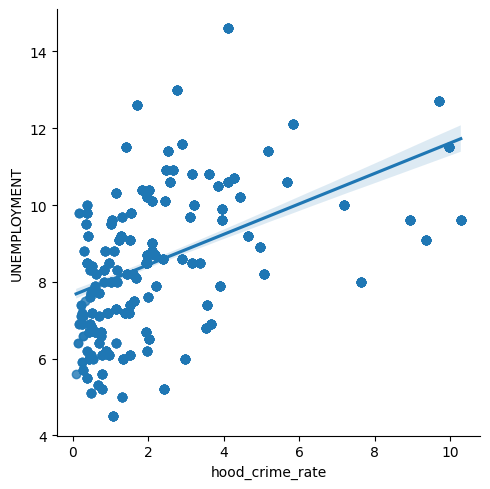

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to UNEMPLOYMENT
sns.lmplot(x = 'hood_crime_rate', y = 'UNEMPLOYMENT', data = df_hoods)

This graph shows that higher UNEMPLOYMENT results in higher crime rate

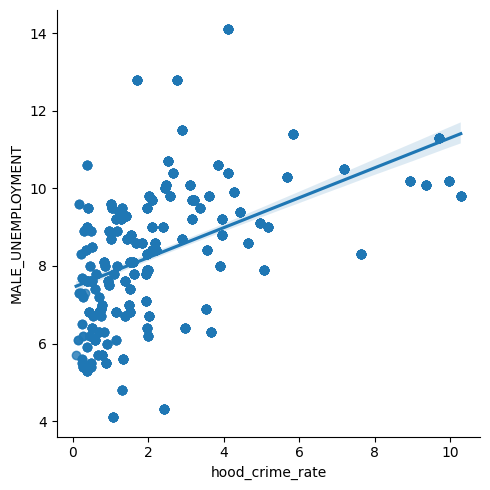

In [ ]:
hoods = grouped_df['HOOD_140'].unique()
df_hoods = grouped_df
hood_crime_rate = {}
# fill the dictionary with hood number and crime rates
for i in hoods:
    hood_crime_rate[i] = np.sum(df_hoods[df_hoods['HOOD_140'] == i]['crime_rate'])

df_hoods['hood_crime_rate'] = df_hoods['HOOD_140'].map(hood_crime_rate)
# now we have the total crime rate of hood_140
# plot crime rate to MALE_UNEMPLOYMENT
sns.lmplot(x = 'hood_crime_rate', y = 'MALE_UNEMPLOYMENT', data = df_hoods)

This graph shows that higher MALE_UNEMPLOYMENT results in higher crime rate